<a href="https://colab.research.google.com/github/maurohrosa/projetos_data_science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito_by_Mauro_Rosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by Mauro Rosa*💻  

---
⏬ *Para mais informações sobre mim e meus projetos*⏬ 
* [Medium](https://maurohrosa.medium.com/)
* [LinkedIn](https://linkedin.com/in/maurorosa)
* [Github](https://github.com/maurohrosa)

------------

>**Detecção de Fraudes em Cartões de Crédito**
--

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. 

O Brasil sofreu aumento de **32,7%** nas tentativas de fraudes em e-commerce no primeiro semestre de 2021 na comparação com o mesmo período do ano passado, conforme mostra o estudo Mapa da Fraude, da consultoria *Clearsale.* **Foram 2,6 milhões de tentativas observadas pelo estudo nos primeiros seis meses deste ano, considerando cerca de 182 milhões de transações via cartão de crédito..**

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="50%"></p>

**O e-commerce** é o destaque dessas tentativas de fraudes, meio pelo qual os criminosos atuaram com força depois que a maior parte das pessoas entrou em isolamento social e passou a fazer mais compras pela internet”, explicou Omar Jarouche, diretor de marketing e soluções da Clearsale.

**Em termos de valores, também foi observado um aumento: nos primeiros seis meses de 2021, a alta foi de 39,5% nos valores que sofreram tentativas de fraudes**. Os valores médios das transações não foram revelados.

>**Tipos de fraudes mais comuns**
--

O estudo também identificou os três tipos de fraudes mais comuns no país. São a fraude efetiva, a fraude amigável e a autofraude.

>**Fraudes em telecomunicações e finanças**
--

A pesquisa também trouxe alguns dados sobre fraudes em outros segmentos. No setor de *telecomunicações*, foram mais de 8,5 milhões de transações analisadas no primeiro semestre. Segundo o estudo, 463 mil tentativas de fraudes foram identificadas pela empresa, ou 5,4% do total. Entre os golpes nessa área, destacam-se o uso indevido de dados, desvio de equipamentos, venda indevida de produtos ou serviços, redução indevida de fatura e upsell de serviços não contratados.

No *mercado financeiro* (transações relativas a bancos, financeiras, fintechs e administradoras de cartões de crédito), foram analisadas quase 21 milhões de transações e as tentativas de fraude chegaram a 667 mil. Ou seja, 3,2% de todas as transações nesse setor foram golpes tentados em processos como abertura de contas, emissão de cartões, empréstimo pessoal e CDC por meios digitais.

``fonte:``[InfoMoney](https://www.infomoney.com.br/minhas-financas/brasil-teve-alta-de-quase-33-nas-tentativas-de-fraude-com-cartao-de-credito-no-1-semestre-mostra-estudo/)

>## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

As *features* (variáveis) são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

Outro detalhe interessante, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total. Dando um desafio a mais para nossa tratativa dos dados e modelo de ML.

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A **Análise de Componentes Principais** (ACP) ou **Principal Component Analysis** (PCA) é um procedimento matemático que utiliza uma *transformação ortogonal* (ortogonalização de vetores) para converter um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores de variáveis ``linearmente não correlacionadas`` chamadas de *componentes principais*.

O número de componentes principais é sempre menor ou igual ao número de variáveis originais. Os componentes principais são garantidamente independentes apenas se os dados forem ``normalmente distribuídos`` (conjuntamente). O PCA é sensível à escala relativa das variáveis originais.
[Wikipédia](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais)

No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.


>**Dicionários das variáveis**
--

* **Time**: *Número de segundos decorridos entre a primeira transação registrada e a transação analisada.*
* As variáveis **n** são referentes as que foram transformadas pelo método PCA:

\begin{align}
V_n\text{onde n  ∈ } \mathbb{N^*} \text{ e n < 29}
\end{align}


* **Amount** : *Quantidade de dinheiro utilizado na transação.*
* **Class**: **1** representa as ``transações fraudulentas`` e **0** as transações ``não-fraudulentas``.*

In [1]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
#visualização dos dados
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#retirando warnings do código
import warnings
warnings.filterwarnings('ignore')
#normalização dos dados
from sklearn.preprocessing import StandardScaler
#algoritmo para under sampling (balanceamento dos dados)
from imblearn.under_sampling import RandomUnderSampler

# Pacotes do sklearn para transformar os dados e aplicar ML
#separar os dados em treino e teste
from sklearn.model_selection import train_test_split
#importar a matriz de confusao
from sklearn.metrics import confusion_matrix
#plotar a matriz de confusao
from sklearn.metrics import plot_confusion_matrix
#modelo de regressão logística
from sklearn.linear_model import LogisticRegression
#modelo Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#plotar arvore de decisao
from sklearn.tree import plot_tree
#modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
#modelo SVM Classifier
from sklearn.svm import SVC
#importando o relatorio para modelos de classificacao
from sklearn.metrics import classification_report
#importando a metrica AUC
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [2]:
#endereco dos dados
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)


Com os dados importados para dentro de uma estrutura **Dataframe** - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma *análise* exploratória dos dados a fim de preparar um modelo de **Machine Learning**.

## Análise Exploratória

No inicio de uma análise exploratória é sempre bom termos em mente um passo a passo inicial, que visa conhecer nosso Dataframe/Dataset (como quiser), sendo eles:

* Dados de entrada 
* Tipos dos dados
* Dados ausentes

para assim começarmos a entender melhor as informações e partir para uma análise de dados mais gráfica e visual.

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Pelo método *info()* já conseguimos visualizar que o dataset **não** possui valores **nulos**.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Como podemos observar, temos a feature ``Time`` que esta representada por segundos, valor minimo em 0, os dados das features **V1** em diante já esta com o **PCA** aplicado, assim não conseguimos tirar grandes conclusões puramente pelo ``Describe()``  
Já para ``Amount`` temos o minimo como 0, e ``Class`` nossa feature *target* como 0 e 1 apenas. Conseguimos concluir que temos um dataset de boa qualidade.

Vamos entender nossos dados, começando pela feature mais interpretativa, **Class** 

In [6]:
#funcao feita para colocar o rotulo de dados
def addlabels(x,y):
  for i in range (len(y)):
    ax.text(i,y[i] + 6000,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=24,color='grey')

Total de registros do dataset: 284807
Os dados que são fraudes representam cerca de: 0.17% de nossa base.


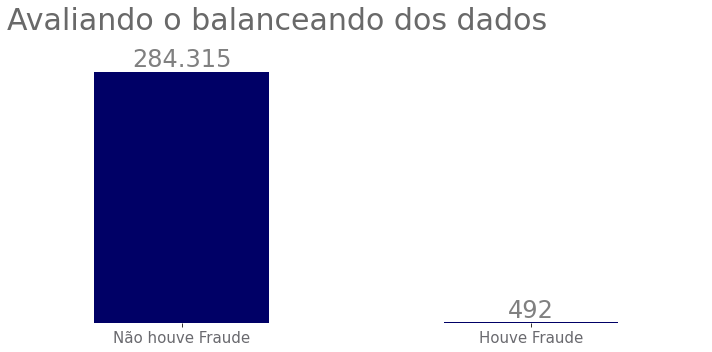

In [7]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(10,5))

#pegando a contagem de valores da variável Class
df.Class.value_counts().plot.bar(ax=ax,color='#000066')

#ajustando as configurações para exibição do gráfico
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.set_title('Avaliando o balanceando dos dados',loc='left',pad=30,fontdict={'fontsize':30},color='dimgrey')
ax.tick_params(axis='x',rotation=0)
ax.set_xticklabels(['Não houve Fraude','Houve Fraude'],fontdict={'fontsize':15},color='#6a6a6f')

#colocando os rótulos de dados
addlabels(df.Class,df.Class.value_counts())


#plotando o gráfico
plt.tight_layout();
print('Total de registros do dataset:',df.shape[0])
print('Os dados que são fraudes representam cerca de: {:.2f}% de nossa base.'.format((df[df.Class == 1].shape[0] / df.Class.shape[0])*100))

Comprovando o que foi dito no inicio, os dados estão **desbalanceados**, apenas 0,17% dos casos estão como **Fraudes**,

De imediato esta constatação inviabilizaria rodar qualquer modelo de machine learning, uma vez que a probabilidade do modelo prever praticamente 100% das entradas como Não Fraude é gigantesca.

Por isso é muito importante identificar este tipo de cenário logo de inicio.

Vamos seguir com nossa análise, um histograma ajuda a entender a distribuição dos dados dentre nossas variáveis.
Vamos ver como os dados de com ou sem Fraude se distribuem na relação de *Time*

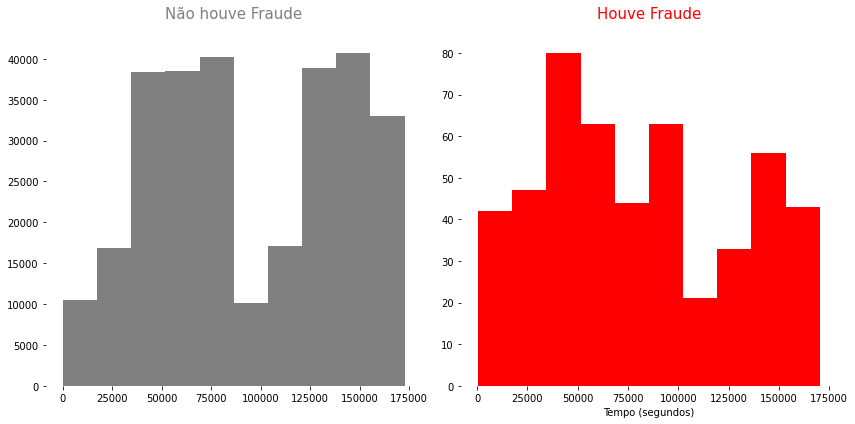

In [8]:
# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].hist(df.Time[df.Class == 0], color='grey')
ax[0].set_frame_on(False)
ax[0].set_title('Não houve Fraude', loc='center', pad=18, color='grey', fontdict={'fontsize':15})

ax[1].hist(df.Time[df.Class == 1], color='r')
ax[1].set_frame_on(False)
ax[1].set_title('Houve Fraude', loc='center', pad=18, color='r', fontdict={'fontsize':15})

plt.xlabel('Tempo (segundos)')
#plt.ylabel('Transações')
plt.tight_layout()

Podemos indentificar, que a feature **Time** tem comportamentos semelhantes quando existem transações com ou sem *Fraude*. No entanto, quando existe uma fraude as operações são um pouco **mais rápidas** se comparado a quando não houve fraude.

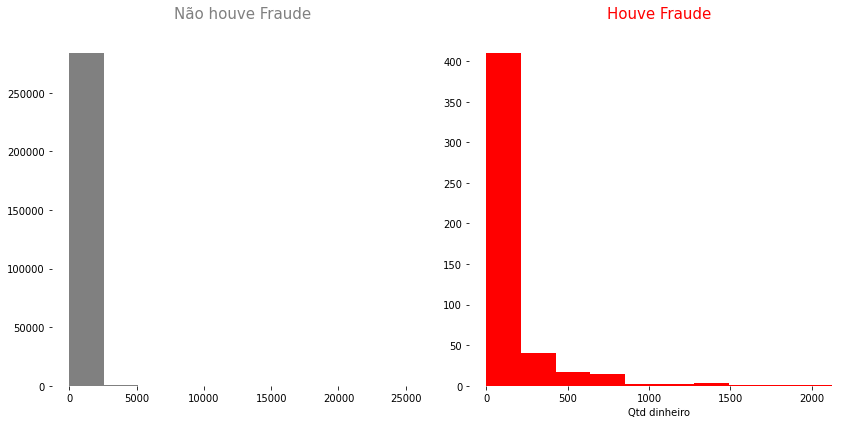

In [9]:
# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
fig, ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].hist(df.Amount[df.Class == 0], color='grey')
ax[0].set_frame_on(False)
ax[0].set_title('Não houve Fraude', loc='center', pad=18, color='grey', fontdict={'fontsize':15})

ax[1].hist(df.Amount[df.Class == 1], color='r')
ax[1].set_frame_on(False)
ax[1].set_title('Houve Fraude', loc='center', pad=18, color='r', fontdict={'fontsize':15})

# plt.xlabel('Tempo (segundos)')
plt.xlabel('Qtd dinheiro')
plt.tight_layout()

Notem que interessante, analisando com a feature **Amount**, identificamos que os casos onde ocorrem as **Fraudes** são de um ponte **menor** financeiramente, podemos notar pelo ``eixo X``, que vai até 2.000 apenas.

Vamos identificar se temos outliers para os casos de Fraude

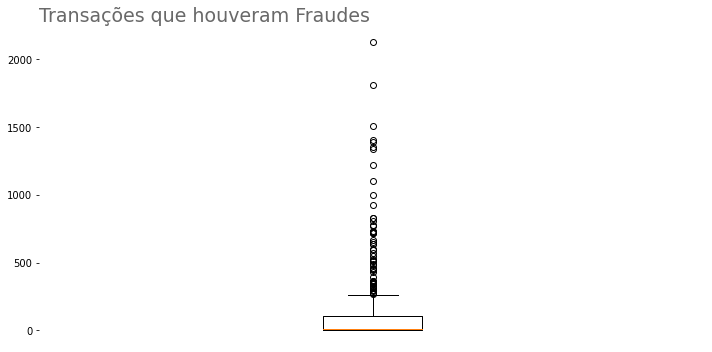

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

ax.boxplot(df.Amount[df.Class == 1]);

# melhorando o gráfico
ax.set_frame_on(False)
ax.set_title('Transações que houveram Fraudes', loc='left', color='dimgrey', fontdict={'fontsize': 19})
ax.get_xaxis().set_visible(False)

plt.tight_layout();

Pelo gráfico é possivel perceber que tivemos *outliers*, mas é sempre bom fazer a prova real

In [11]:
# Calculando o IQT
primeiro_quartil = df.Amount[df.Class == 1].quantile(0.25)
terceiro_quartil = df.Amount[df.Class == 1].quantile(0.75)
intervalo_interquartilico = terceiro_quartil - primeiro_quartil
maximo = terceiro_quartil + (1.5*intervalo_interquartilico)

#contabilizando a quantidade de outliers
porcent = df[df['Amount'] > maximo].shape[0] / df.shape[0]
print('Dados onde houveram fraude, aproximadamente {:.0f}% são considerados como outliers. A maioria está abaixo de {:.2f}, que representa o valor do terceiro quartil.'.format((porcent*100),terceiro_quartil))

Dados onde houveram fraude, aproximadamente 8% são considerados como outliers. A maioria está abaixo de 105.89, que representa o valor do terceiro quartil.


Vamos ver se os valores Fraudados são altos, mais a titulo de curiosidade

In [12]:
amount_mean = df.Amount[df.Class == 1].mean()
amount_max = df.Amount[df.Class == 1].max()
print('O valor médio das transações fraudulentas é de {:.2f} e o maior é de {:.2f}.'.format(amount_mean, amount_max))

O valor médio das transações fraudulentas é de 122.21 e o maior é de 2125.87.


* Vamos ver a correlação dos dados, mesmo desbalanceados

df_corr = df.corr()

In [13]:
df_corr = df.corr()

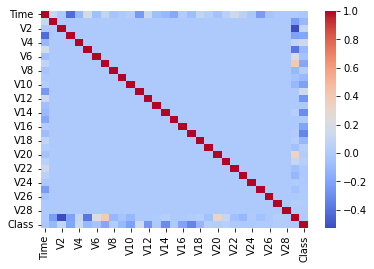

In [14]:
sns.heatmap(df_corr, cmap='coolwarm');

Certo, até agora vimos analises mesmo com os dados desbalanceados, para iniciarmos nossos estudos e aplicabilidade de modelos de **ML** , precisaremos balancear os mesmos, e o *scikit learn* é fundamental para isso. 

*Vamos utilizar o método [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) para padronizar nossos dados e [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) para balancearmos nossos dados.*

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados

In [15]:
df_clean = df.copy()

In [16]:
df_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
scaler = StandardScaler().fit(df_clean[['Time','Amount']])

In [18]:
# Vamos substituir os dados pelos padronizados
df_clean[['Time','Amount']] = scaler.transform(df_clean[['Time','Amount']])

Vamos preparar nossos dados para aplicar os modelos de ML, primeiramente precisamos isolar nossa variável **target**, no caso ``Class``, faremos uma variável **X** com todas as demais features, e uma **Y** apenas com nosso **target**.


In [19]:
#separar as variáveis x e y
x = df_clean.drop('Class',axis=1)
y=df_clean.Class

*Agora dividir nosso Dataset em Treino e Teste, tambem usaremos um parâmetro chamado [stratify](https://datascience.stackexchange.com/questions/40584/meaning-of-stratify-parameter) que ira preservar a proporção da nossa variável target.*

In [20]:
#divindo o dataset em dados de treino e teste
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=42)

*Agora vamos Balancear os dados*

In [21]:
# usar técnica under-sampling
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x_train, y_train)

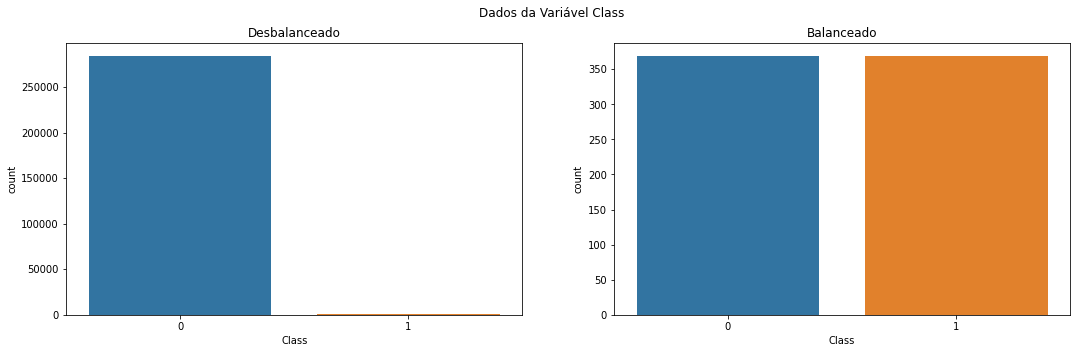

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,5))
fig.suptitle('Dados da Variável Class')

sns.countplot(df.Class, ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.countplot(y_rus,ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()


*Vamos ver se temos alguma correlação com os dados Balanceados*

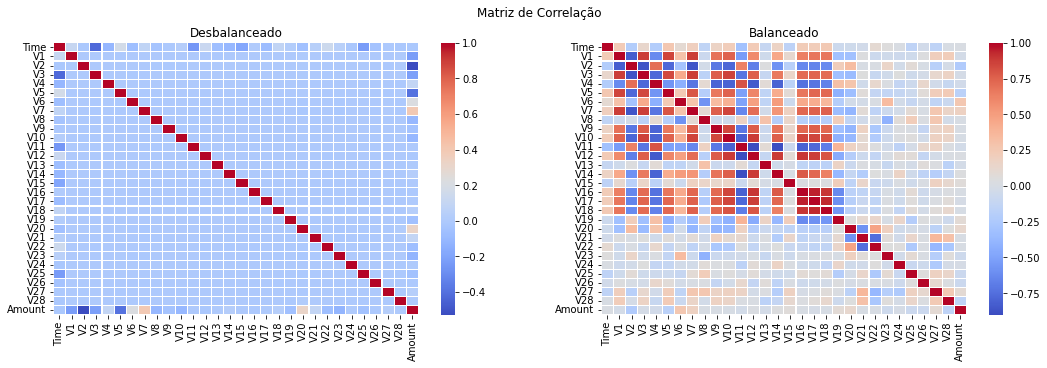

In [23]:
corr = x_train.corr()
corr_rus = pd.DataFrame(x_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,5))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

*Os algoritmos de Machine Learning podem ser divididos em 3 categorias:*

- **Supervisionado**, quando temos um *target*, uma saida que ira nos ajudar nas previsões futuras.
- **Não supervisionado**,  mais conhecidos como *Clusterização* identificam semelhanças nos dados e reagem com base na presença ou ausência de tais semelhanças em cada novo dado.
- **Aprendizado por reforço** está entre estes dois extremos, pois existe alguma forma de feedback disponível para cada passo ou ação preditiva, modelo aprende conforme seus erros/acertos.



*No nosso caso, usaremos um modelo **Supervisionado** de **Classificação**, uma vez que nossos dados são meio que rotulados 0 e 1, mas existem modelos supervisionados de regressão e por ai vai...*

*Para melhor avaliar um modelo de classificação podemos utilizar a **matriz de confusão**.*


<p align="center">
<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg"
 width="50%">
</p>

**Tipos de erros apontados na matriz de confusão:**

* **Verdadeiro positivo (*true positive* — TP):** *O modelo previu que haveria fraude e a resposta é que houve fraude.*

* **Falso positivo (*false positive* — FP):** *Quando não houve fraude na transação e o modelo classifica como uma transação fraudosa.*

* **Falso negativo (*true negative* — TN)**: *O modelo previu que não houve fraude e a resposta é que não houve fraude.*

* **Verdadeiro negativo (*false negative* — FN):** *Quando houve uma fraude na transação e o modelo classifica que não houve fraude.*


*Mais importante que conhecer a **Matriz de Confusão** é saber interpretá-la e usar a métrica mais adequada para o tipo e o risco do negócio. Vamos conhecer elas.*

* *accuracy: Informa em geral o quão o seu modelo está acertando.
Ela mostra diretamente a porcentagem de acertos do algoritmo.*

$$
\text{accuracy} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}
$$

* *precision: Pode ser interpretada como: dos que eu classifiquei como certos, quantos eram realmente certos.*
\begin{align}
precision = \frac{TP}{TP+FP}
\end{align}

* *recall: Proporção de positivos que foram identificados corretamente, ou seja, demonstra quão bom o modelo é em prever positivos, sendo positivos a classe que se quer prever. Ele pode ser calculado como:*
\begin{align}
recall = \frac{TP}{TP+FN}
\end{align}

* *f1-score: é a média ponderada entre a precision e o recall.*
* *support: é o número de ocorrências da classe especificada no conjunto de dados. Ou seja, se for uma transação fraudosa será o número de elementos que representam uma transação fraudosa na base de dados de teste.*
* *AUC: é uma métrica que mede o quão bem o modelo separa as classes da variável resposta baseado na sua distribuição acumulada. Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1*


## Modelo de Machine Learning

* Agora com os dados devidamente padronizados e balanceados, vamos construir nossos modelos de *machine learning* para **classificação**

> **Regressão Logística**

In [24]:
# Startando o modelo
lr = LogisticRegression()
# Fazendo o fit nos dados balanceados
lr.fit(x_rus,y_rus)
# fazer as previsões nos dados de teste
y_pred_lr = lr.predict(x_test)

In [25]:
# imprimir a acurácia do modelo
print("Acurácia: {:.3f}\n".format(accuracy_score(y_test, y_pred_lr)))

# imprimir a área sob da curva
print("AUC: {:.3f}\n".format(roc_auc_score(y_test, y_pred_lr)))

print(classification_report(y_test, y_pred_lr, digits=2))

Acurácia: 0.978

AUC: 0.932

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202



Vamos ver nossa Matriz de Confusão para a **Regressão Logistica**

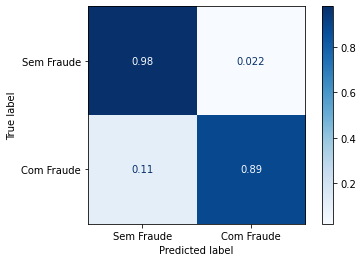

In [26]:
plot_confusion_matrix(lr,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude']);

*Rodamos nosso primeiro modelo de ML, vamos outros para entender qual teve a melhor performance*

> **Arvore de Decisão**

Acurácia: 0.899

AUC: 0.897

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71079
           1       0.02      0.89      0.03       123

    accuracy                           0.90     71202
   macro avg       0.51      0.90      0.49     71202
weighted avg       1.00      0.90      0.95     71202



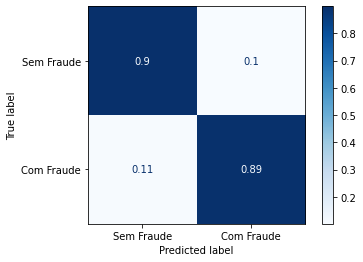

In [27]:
# Startando o modelo
dtc = DecisionTreeClassifier()
# Fazendo o fit nos dados balanceados
dtc.fit(x_rus,y_rus)
# fazer as previsões nos dados de teste
y_pred_dtc = dtc.predict(x_test)

# imprimir a acurácia do modelo
print("Acurácia: {:.3f}\n".format(accuracy_score(y_test, y_pred_dtc)))

# imprimir a área sob da curva
print("AUC: {:.3f}\n".format(roc_auc_score(y_test, y_pred_dtc)))

print(classification_report(y_test, y_pred_dtc, digits=2))

plot_confusion_matrix(dtc,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude']);

Podemos ver a árvore de decisão em ação tb.

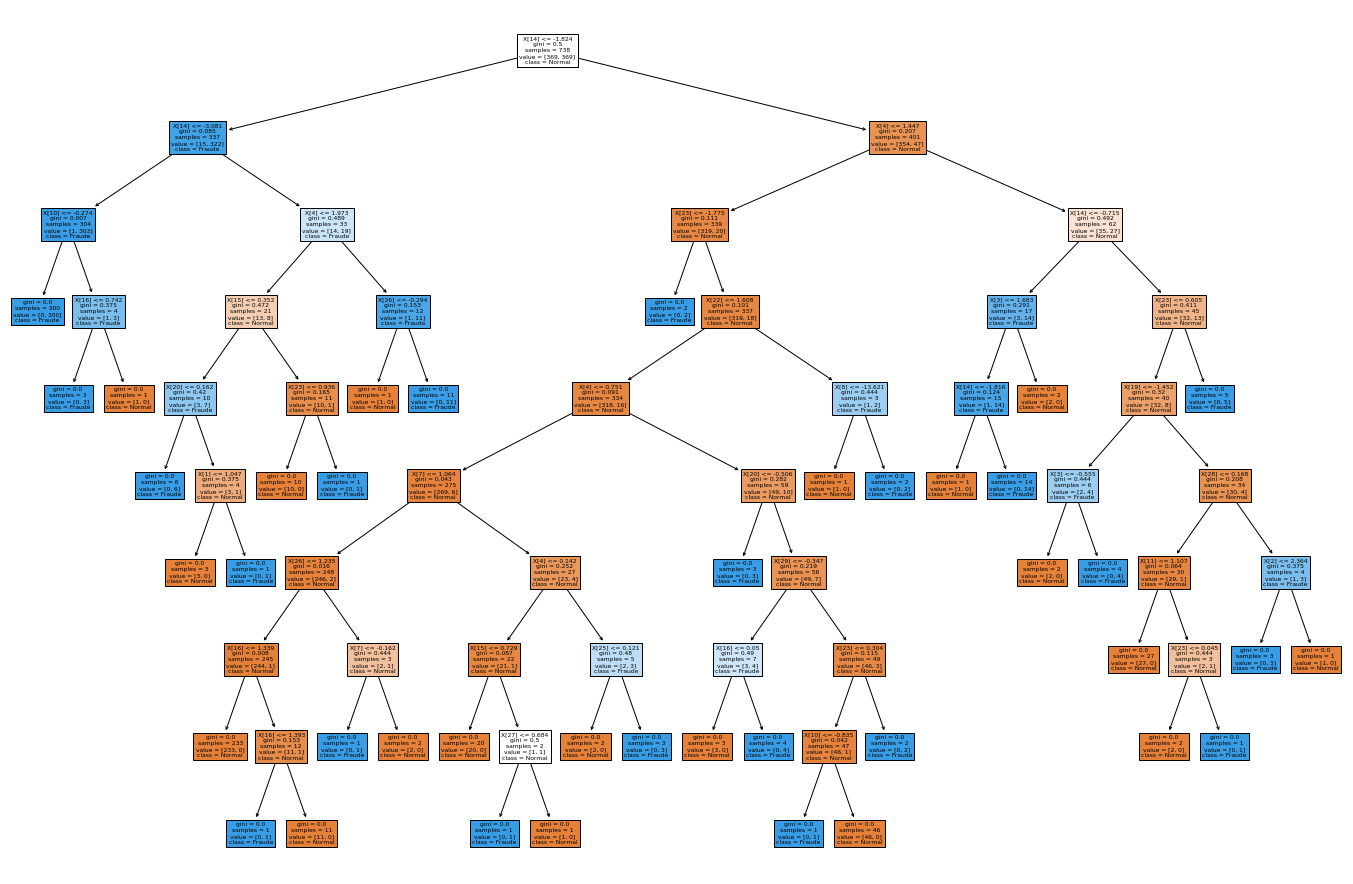

In [28]:
fig= plt.figure(figsize=(24,16))
ax = plot_tree(dtc,filled=True,class_names=["Normal","Fraude"]);

> **Random Forest**

Acurácia: 0.982

AUC: 0.930

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.88      0.14       123

    accuracy                           0.98     71202
   macro avg       0.54      0.93      0.57     71202
weighted avg       1.00      0.98      0.99     71202



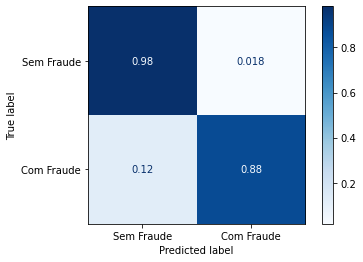

In [29]:
# Startando o modelo
rfc = RandomForestClassifier()
# Fazendo o fit nos dados balanceados
rfc.fit(x_rus,y_rus)
# fazer as previsões nos dados de teste
y_pred_rfc = rfc.predict(x_test)

# imprimir a acurácia do modelo
print("Acurácia: {:.3f}\n".format(accuracy_score(y_test, y_pred_rfc)))

# imprimir a área sob da curva
print("AUC: {:.3f}\n".format(roc_auc_score(y_test, y_pred_rfc)))

print(classification_report(y_test, y_pred_rfc, digits=2))

plot_confusion_matrix(rfc,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude']);

Por último, mas não menos importante.

> **SVC** (Support Vector Classification), da famila do **SVM** (Support Vector Machine)

Acurácia: 0.985

AUC: 0.924

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.09      0.86      0.17       123

    accuracy                           0.99     71202
   macro avg       0.55      0.92      0.58     71202
weighted avg       1.00      0.99      0.99     71202



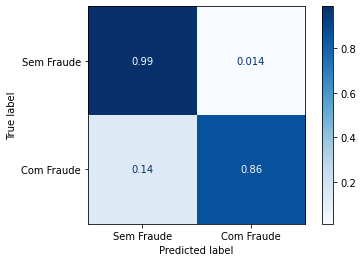

In [30]:
# Startando o modelo
svc = SVC()
# Fazendo o fit nos dados balanceados
svc.fit(x_rus,y_rus)
# fazer as previsões nos dados de teste
y_pred_svc = svc.predict(x_test)

# imprimir a acurácia do modelo
print("Acurácia: {:.3f}\n".format(accuracy_score(y_test, y_pred_svc)))

# imprimir a área sob da curva
print("AUC: {:.3f}\n".format(roc_auc_score(y_test, y_pred_svc)))

print(classification_report(y_test, y_pred_svc, digits=2))

plot_confusion_matrix(svc,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude']);

Ótimo, temos 4 modelos, agora precisamos analisa-los e ver qual melhor se adequa ao nosso problema. Nestas horas melhorar a forma de analisar os 4 simultaneamente ajuda, e muito. É o que vamos fazer.

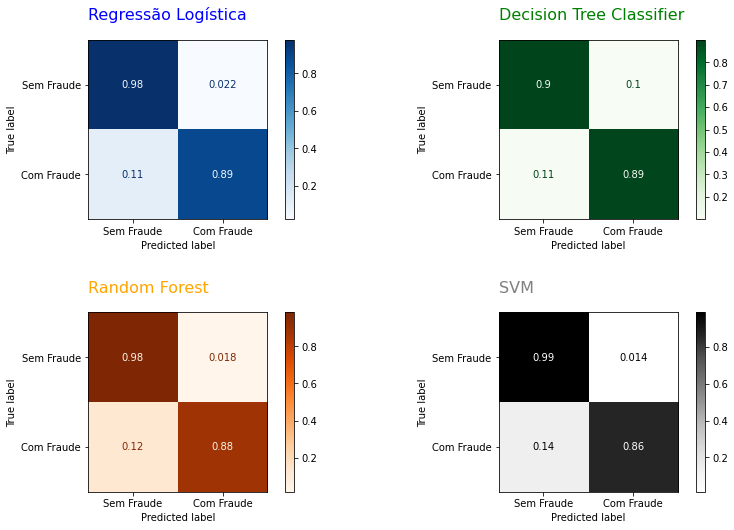

In [31]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(12,8),nrows=2,ncols=2)

#primeiro gráfico - regressão logística
plot_confusion_matrix(lr,x_test,y_test,normalize='true',cmap=plt.cm.Blues,display_labels=['Sem Fraude','Com Fraude'],ax=ax[0][0])
ax[0][0].set_title('Regressão Logística',loc='left',pad=20,fontdict={'fontsize':16},color='blue')

#segundo gráfico - decision tree classifier
plot_confusion_matrix(dtc,x_test,y_test,normalize='true',cmap=plt.cm.Greens,display_labels=['Sem Fraude','Com Fraude'],ax=ax[0][1])
ax[0][1].set_title('Decision Tree Classifier',loc='left',pad=20,fontdict={'fontsize':16},color='green')

#terceiro gráfico - Random Forest
plot_confusion_matrix(rfc,x_test,y_test,normalize='true',cmap=plt.cm.Oranges,display_labels=['Sem Fraude','Com Fraude'],ax=ax[1][0])
ax[1][0].set_title('Random Forest',loc='left',pad=20,fontdict={'fontsize':16},color='orange')

#quarto gráfico - SVM
plot_confusion_matrix(svc,x_test,y_test,normalize='true',cmap=plt.cm.Greys,display_labels=['Sem Fraude','Com Fraude'],ax=ax[1][1])
ax[1][1].set_title('SVM',loc='left',pad=20,fontdict={'fontsize':16},color='grey')

#plotando os gráficos
plt.tight_layout(pad=3.0);

In [32]:
classification_report(y_test,y_pred_lr,digits=2,output_dict=True)


{'0': {'f1-score': 0.9886622282917947,
  'precision': 0.9997985988232417,
  'recall': 0.9777712123130601,
  'support': 71079},
 '1': {'f1-score': 0.12030905077262695,
  'precision': 0.0645352279455299,
  'recall': 0.8861788617886179,
  'support': 123},
 'accuracy': 0.9776129883992023,
 'macro avg': {'f1-score': 0.5544856395322109,
  'precision': 0.5321669133843858,
  'recall': 0.9319750370508391,
  'support': 71202},
 'weighted avg': {'f1-score': 0.9871621659222705,
  'precision': 0.9981829504619883,
  'recall': 0.9776129883992023,
  'support': 71202}}

In [33]:
classification_report(y_test,y_pred_lr,digits=2,output_dict=True)['0']['f1-score']

0.9886622282917947

In [38]:
modelos = ['Logística','Decion Tree','Random Forest','SVC']
indicadores = {
             'Recall_n_f':[classification_report(y_test,y_pred_lr,digits=2,output_dict=True)['0']['recall'],
                       classification_report(y_test,y_pred_dtc,digits=2,output_dict=True)['0']['recall'],
                       classification_report(y_test,y_pred_rfc,digits=2,output_dict=True)['0']['recall'],
                       classification_report(y_test,y_pred_svc,digits=2,output_dict=True)['0']['recall']],
             'f1-score_n_f':[classification_report(y_test,y_pred_lr,digits=2,output_dict=True)['0']['f1-score'],
                       classification_report(y_test,y_pred_dtc,digits=2,output_dict=True)['0']['f1-score'],
                       classification_report(y_test,y_pred_rfc,digits=2,output_dict=True)['0']['f1-score'],
                       classification_report(y_test,y_pred_svc,digits=2,output_dict=True)['0']['f1-score']],
             'Recall_c_f':[classification_report(y_test,y_pred_lr,digits=2,output_dict=True)['1']['recall'],
                       classification_report(y_test,y_pred_dtc,digits=2,output_dict=True)['1']['recall'],
                       classification_report(y_test,y_pred_rfc,digits=2,output_dict=True)['1']['recall'],
                       classification_report(y_test,y_pred_svc,digits=2,output_dict=True)['1']['recall']],               
             'AUC':[roc_auc_score(y_test,y_pred_lr),roc_auc_score(y_test,y_pred_dtc),roc_auc_score(y_test,y_pred_rfc),roc_auc_score(y_test,y_pred_svc)],
             'Falsos positivos':[confusion_matrix(y_test,y_pred_lr,normalize='true')[0][1],
                                 confusion_matrix(y_test,y_pred_dtc,normalize='true')[0][1],
                                 confusion_matrix(y_test,y_pred_rfc,normalize='true')[0][1],
                                 confusion_matrix(y_test,y_pred_svc,normalize='true')[0][1]]}


#criando um DataFrame do pandas para melhor visualização
pd.DataFrame(indicadores,index=modelos).sort_values(['Falsos positivos','AUC'],ascending=[True,False]).round(2)

,Recall_n_f,f1-score_n_f,Recall_c_f,AUC,Falsos positivos
SVC,0.99,0.99,0.86,0.92,0.01
Random Forest,0.98,0.99,0.88,0.93,0.02
Logística,0.98,0.99,0.89,0.93,0.02
Decion Tree,0.90,0.95,0.89,0.90,0.10


## **Conclusões**

* *A **Regra de Negócio** ajuda e muito a nortear qual a melhor métrica a ser seguida ou melhorada, pegando nosso caso como exemplo: ``O que seria menos custoso para a empresa?`` Como vimos, os modelos performaram muito bem nos casos onde não tivemos fraude, mas seria esse o melhor para a empresa? Mesmo em menor volume, os casos de fraude costumam gerar grandes prejuizos, desta forma, um modelo focado em identificar as fraudes (*Recall_c_f*) como mostramos na tabela acima, pode ajudar e muito a minimizar estes prejuizos.*

* Obviamente, podemos melhorar nossos modelos, ajustando os **hiperparâmetros** usando **Cross-validation**, **Grid-Search**, **feature Selection** dentre outras formas e práticas que podem melhorar nossos resultados.

*Este projeto com vies acadêmico, traz justamente estes pontos, modelos de machine learnung por si só, de certa forma, são "simples" de serem implementados, rodamos 4 modelos com poucas alterações de código. O entendimento do negócio, como já vi e ouvi em diversos artigos sobre ML, é sim um passo fundamental para o sucesso ou fracasso de um modelo, nem sempre uma métrica próximo a 100% é sinal de sucesso, muitas vezes um ponto percentual de melhoria pode significar um crescimento financeiro absurdo, um aumento de competitividade significativo para o negócio, ou uma redução na despesa/prejuízo que pode auxiliar no fluxo de caixa, ou até mesmo evitar demissões, enfim. Valorize todas as etapas do processo, não tenha pressa para implementar um modelo de *machine learning* só por implantar, muitas vezes você terá insights no processo de **ETL**, de **Feature engineering**, testando as hipóteses. Use e abuse da criatividade com os dados, transforme os mesmos em informação, que no final é o que vai gerar valor para a empresa.  